<a href="https://colab.research.google.com/github/cwpark501/202211422/blob/main/DataTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import datetime

sample_data 파일에 russia_losses_equipment.csv, russia_losses_personnel.csv를 넣고 읽어들입니다.

In [300]:
df_equipment = pd.read_csv("sample_data/russia_losses_equipment.csv")
df_personnel = pd.read_csv("sample_data/russia_losses_personnel.csv")

In [301]:
df_equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
df_personnel.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


In [303]:
df_equipment.shape

(661, 19)

In [304]:
df_personnel.shape

(661, 5)

isnull().sum()을 이용하여 데이터 결측치를 조사해봅니다.

In [305]:
df_equipment.isnull().sum()

date                           0
day                            0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
military auto                596
fuel tank                    596
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment             19
mobile SRBM system           625
greatest losses direction    458
vehicles and fuel tanks       65
cruise missiles               65
submarines                   566
dtype: int64

In [306]:
df_personnel.isnull().sum()

date            0
day             0
personnel       0
personnel*      0
POW           599
dtype: int64

정확한 분석을 위해, NAN값은 모두 0으로 교체합니다.
또한 크게 의미 없는 데이터에 대해서, 병합하거나 제거합니다.

In [307]:
for column in df_equipment.columns:
  df_equipment[column] = df_equipment[column].map(lambda x : np.nan_to_num(x))

df_equipment['vehicles and fuel tanks'] = df_equipment['vehicles and fuel tanks'] + df_equipment['military auto'] + df_equipment['fuel tank']
df_equipment = df_equipment.drop(['military auto', 'fuel tank', 'mobile SRBM system'], axis = 1)

In [308]:
df_equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2022-02-25,2,10,7,80,516,49,4,0,2,0,0.0,0.0,160.0,0.0,0.0
1,2022-02-26,3,27,26,146,706,49,4,2,2,0,0.0,0.0,190.0,0.0,0.0
2,2022-02-27,4,27,26,150,706,50,4,2,2,0,0.0,0.0,190.0,0.0,0.0
3,2022-02-28,5,29,29,150,816,74,21,3,2,5,0.0,0.0,351.0,0.0,0.0
4,2022-03-01,6,29,29,198,846,77,24,3,2,7,0.0,0.0,365.0,0.0,0.0


In [309]:
df_personnel.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


In [310]:
df_equipment.isnull().sum()

date                         0
day                          0
aircraft                     0
helicopter                   0
tank                         0
APC                          0
field artillery              0
MRL                          0
drone                        0
naval ship                   0
anti-aircraft warfare        0
special equipment            0
greatest losses direction    0
vehicles and fuel tanks      0
cruise missiles              0
submarines                   0
dtype: int64

In [311]:
df_personnel.isnull().sum()

date            0
day             0
personnel       0
personnel*      0
POW           599
dtype: int64

POW(Prisoner Of War)는 데이터에서 제외합니다.

In [312]:
df_personnel.drop('POW', axis=1, inplace=True)

손실된 각각의 기체를 y축, 기간을 X축으로 하여 그래프로 구현합니다.

In [317]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

var = ["aircraft","helicopter","tank","APC",
       "field artillery","MRL","drone","naval ship",
       "anti-aircraft warfare","vehicles and fuel tanks",
       "special equipment","cruise missiles", "submarines"]

fig = make_subplots(rows = 5, cols = 3, subplot_titles=var)
row_count = col_count = 1

for column in var:
  fig.add_trace(go.Scatter(x = df_equipment['date'], y = df_equipment[column], name=column), row = row_count, col = col_count)
  col_count += 1
  if col_count == 4:
    col_count = 1
    row_count+= 1

fig.show()

In [314]:
fig=px.line(df_personnel, x='date', y='personnel',title='러시아군 인력 손실')
fig.update_traces(marker=dict(size=5))
fig.update_layout(title_x=0.5)

인력 손실과 기체 손실간의 상관관계를 측정해봅니다.

In [315]:
cor_data = df_equipment.corrwith(df_personnel['personnel'], numeric_only=True)
cor_data

day                        0.984936
aircraft                   0.786420
helicopter                 0.872754
tank                       0.965049
APC                        0.960889
field artillery            0.971259
MRL                        0.984062
drone                      0.985648
naval ship                 0.788812
anti-aircraft warfare      0.984278
special equipment          0.960769
vehicles and fuel tanks    0.980127
cruise missiles            0.990634
submarines                 0.658363
dtype: float64

상관관계를 토대로, 시각화를 적용합니다.

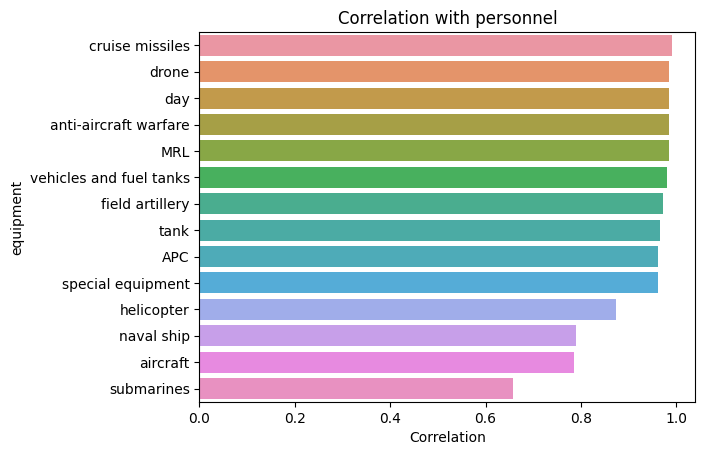

In [316]:
cor_data = pd.DataFrame({'equipment': cor_data.index, 'correlation': cor_data.values})
cor_data = cor_data.sort_values(by='correlation', ascending=False)
plt.figure()
sns.barplot(data=cor_data,x = 'correlation', y='equipment', orient='height')
plt.title('Correlation with personnel')
plt.xlabel('Correlation')
plt.ylabel('equipment')
plt.show()
